# Mid term test
Introduction to Numerical Problem Solving, Spring 2017   
Chanh Nguyen  
Helsinki Metropolia University of Applied Sciences   
March 15th, 2017

In [1]:
# Initial import statements
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import *
from numpy import *
from scipy.linalg import *
from decimal import *
import math
from numpy.linalg import solve, inv, det

## Exercise 1

### (a) Draw in the same graph the logarithmic function and its 5th orther polynomial approximation. Use a suitable domain

In [2]:
def logarithmOrderFive(x):
    #The order is 5
    n = 5
    result = 0
    for i in range(1,n+1):
        result += (-1)**(i-1)*(1.0/i)*(x-1)**i
    return result

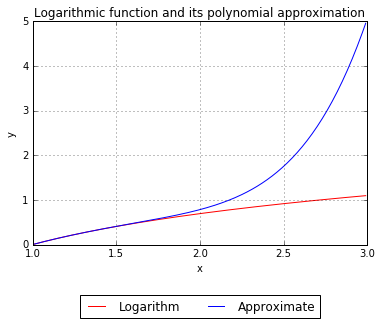

In [3]:
# x from 1.0 to 3.0
x = arange(1.0, 3.0, 0.01)
y1 = log(x)
y2 = logarithmOrderFive(x)

#The true value is plot in red line, and calculated value is in blue line
plot(x,y1,'r-', label="Logarithm")
plot(x,y2,'b-', label="Approximate")
legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
grid()
xlabel('x')
ylabel('y')
title('Logarithmic function and its polynomial approximation')

**SL: Good**

### (b) How much is the relative true error at x = 2.0 for the 5th order polynomial approximation?

In [4]:
#True error
ET = abs(log(2)-logarithmOrderFive(2))
#Relative error
eT = ET/log(2)
print("The relative error is: "+str(round(eT*100,2))+" %")

The relative error is: 13.01 %


**SL: Good*

### (c) Find out how many terms are needed to approximate the logarithmic function correctly at least 3 significant figures at x = 2.0

In [5]:
def logarithmWithOrder(x, order):
    result = 0
    for i in range(1,order+1):
        result += (-1)**(i-1)*(1.0/i)*(x-1)**i
    return result

In [6]:
#Tolerant, the result is correct at least 3 significant figures
eS = (0.5*10**(2-3))/100
# Started order is 5
order = 5

# Maximum iteration is 10e4
while order < 10e4:
    #The true error
    ET = abs(log(2)-logarithmWithOrder(2, order))
    
    #If the true error is less than the tolerant, than break
    if ET < eS:
        break
        
    order += 1

print("The true value log(2.0) is: "+str(log(2)))
print("The calculated value log(2.0) is: "+str(logarithmWithOrder(2, order)))
print("The order needed : "+str(order))

The true value log(2.0) is: 0.69314718056
The calculated value log(2.0) is: 0.6926474305598223
The order needed : 1000


**SL: Good.**

## Exercise 2
### Study graphically the following function in the domain $x >= 0$

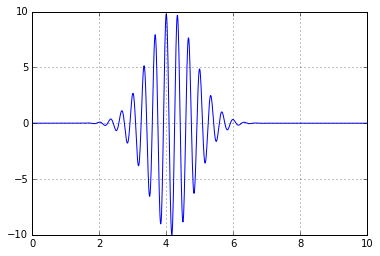

In [7]:
x = arange(0.0, 10.0, 0.01)
y = 10.0*e**(-(x-4.15)**2)*cos(6.0*pi*x)
plot(x,y)
grid()

### (a) What is maximum value of f(x) ?

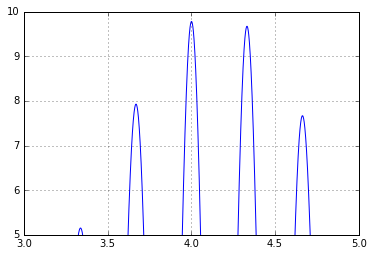

In [8]:
x = arange(0.0, 10.0, 0.001)
y = 10.0*e**(-(x-4.15)**2)*cos(6.0*pi*x)
plot(x,y)
xlim([3.0,5.0])
ylim([5.0,10.0])
grid()

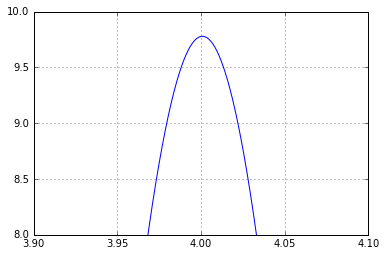

In [9]:
x = arange(0.0, 10.0, 0.0001)
y = 10.0*e**(-(x-4.15)**2)*cos(6.0*pi*x)
plot(x,y)
xlim([3.9,4.1])
ylim([8.0,10.0])
grid()

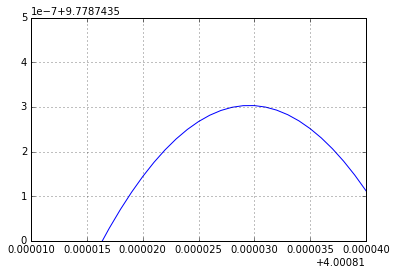

In [10]:
x = arange(0.0, 10.0, 0.000001)
y = 10.0*e**(-(x-4.15)**2)*cos(6.0*pi*x)
plot(x,y)
xlim([4.00082,4.00085])
ylim([9.7787435,9.778744])
grid()

### The maximum value of f(x) is approximate 9.779

### (b) What is the largest value of x, when f(x) = 5.0 ?

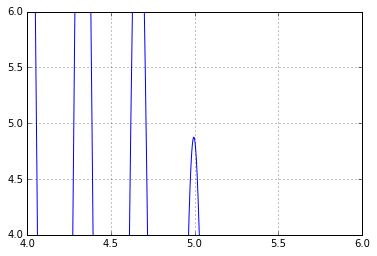

In [11]:
x = arange(0.0, 10.0, 0.001)
y = 10.0*e**(-(x-4.15)**2)*cos(6.0*pi*x)
plot(x,y)
xlim([4.0,6.0])
ylim([4.0,6.0])
grid()

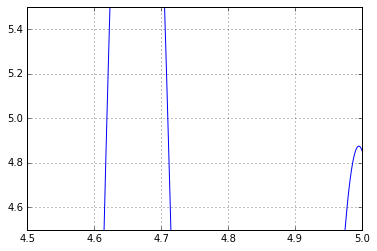

In [12]:
x = arange(0.0, 10.0, 0.001)
y = 10.0*e**(-(x-4.15)**2)*cos(6.0*pi*x)
plot(x,y)
xlim([4.5,5.0])
ylim([4.5,5.5])
grid()

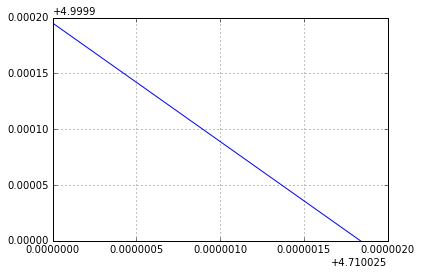

In [13]:
x = arange(0.0, 10.0, 0.0001)
y = 10.0*e**(-(x-4.15)**2)*cos(6.0*pi*x)
plot(x,y)
xlim([4.710025,4.710027])
ylim([4.9999,5.0001])
grid()

### The largest value of x, when f(x) = 5.0 is approximate 4.710

### (c) At which location of x does the function have minimum?

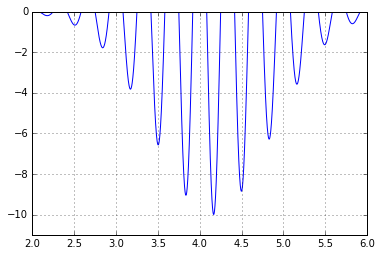

In [14]:
x = arange(0.0, 10.0, 0.001)
y = 10.0*e**(-(x-4.15)**2)*cos(6.0*pi*x)
plot(x,y)
xlim([2.0,6.0])
ylim([-11.0,0.0])
grid()

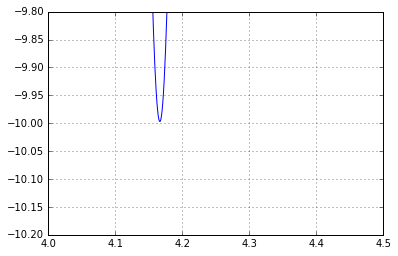

In [15]:
x = arange(0.0, 10.0, 0.001)
y = 10.0*e**(-(x-4.15)**2)*cos(6.0*pi*x)
plot(x,y)
xlim([4.0,4.5])
ylim([-10.2,-9.8])
grid()

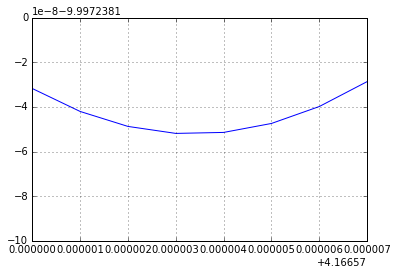

In [16]:
x = arange(0.0, 10.0, 0.000001)
y = 10.0*e**(-(x-4.15)**2)*cos(6.0*pi*x)
plot(x,y)
xlim([4.16657,4.166577])
ylim([-9.9972382,-9.9972381])
grid()

### The function have minimum at x = 4.167

**SL: Good.**

## Exercise 3
### The equilibrium equations of a truss joints shown in figure 1 can be written

### (a) Write the equations in matrix form in Python

In [17]:
#The matrix on the left of the equations
A = array([[-1,1,-1/sqrt(2),0,0,0],
     [0,0,1/sqrt(2),1,0,0],
     [0,-1,0,0,-1/sqrt(2),0],
     [0,0,0,0,1/sqrt(2),0],
     [0,0,0,0,1/sqrt(2),1],
     [0,0,0,-1,-1/sqrt(2),0]])
print("Array A is")
print(A)

#The matrix on the right of the equations
b = [0,18,0,12,0,0]
print("Array b is")
print(b)

Array A is
[[-1.          1.         -0.70710678  0.          0.          0.        ]
 [ 0.          0.          0.70710678  1.          0.          0.        ]
 [ 0.         -1.          0.          0.         -0.70710678  0.        ]
 [ 0.          0.          0.          0.          0.70710678  0.        ]
 [ 0.          0.          0.          0.          0.70710678  1.        ]
 [ 0.          0.          0.         -1.         -0.70710678  0.        ]]
Array b is
[0, 18, 0, 12, 0, 0]


### (b) Solve these equations using any functions of your choice

In [18]:
x = solve(A,b)
print("The solution is")
print(x)

The solution is
[-42.         -12.          42.42640687 -12.          16.97056275 -12.        ]


### (c) Rearrange the rows and colums so as to obtain a lower triangular coefficient matrix, and then solve them by back substitution

In [19]:
def GaussianPivot(A, b):
    A = A.copy()
    b = b.copy()
    N = len(b)
    x = zeros(N)
    # Step 1. Forward elimination
    for k in range(0, N-1):
        # Pivoting the rows
        r = argmax(abs(A[k:, k])) + k
        
        if r != k:
            temp = A[k, :].copy()
            A[k, :] = A[r, :]
            A[r, :] = temp

            temp = b[k].copy()
            b[k] = b[r]
            b[r] = temp
        
        for i in range(k+1, N):
            factor = A[i, k] / A[k, k]
            for j in range(N):
                A[i, j] -= factor * A[k, j]
            b[i] -= factor * b[k]
    
    print("The upper triangular A is:")
    print(A)
    print("And b is:")
    print(b)
    
    # Step 2. Backward substitution
    for i in range(N-1, -1, -1):
        s = b[i]
        for j in range(i+1, N):
            s -= A[i, j] * x[j]
        x[i] = s / A[i, i]

    return x

In [20]:
xC = GaussianPivot(A, b)
print("The solution is")
print(xC)

The upper triangular A is:
[[-1.          1.         -0.70710678  0.          0.          0.        ]
 [ 0.         -1.          0.          0.         -0.70710678  0.        ]
 [ 0.          0.          0.70710678  1.          0.          0.        ]
 [ 0.          0.          0.         -1.         -0.70710678  0.        ]
 [ 0.          0.          0.          0.          0.70710678  1.        ]
 [ 0.          0.          0.          0.          0.         -1.        ]]
And b is:
[0, 0.0, 18.0, 0.0, 0.0, 12.0]
The solution is
[-42.         -12.          42.42640687 -12.          16.97056275 -12.        ]


**SL: The GaussianPivot algorithm also rescale the coefficients, and that's what happened here. It goes a step further than just rearranging the rows and columns.**